# Motivating example

Consider an ODE $ y^\prime = -y \quad y(0) = 1$, which has an analytical answer $y = e^{-t}$.

We wish to approximate this function numerically between $[0,1]$ with a line defined by the boundary points, $f(0) = a = 1$ and $f(1) = b$, $$f(x) =  [1-x] + x b$$

How do we find $b$?

### Option 1: Direct substitution

Following the Finite Difference method, we can subsitute $f(1)$ into the ODE and solve for b:

$$\begin{align}
f'(1) &= f(1) \\
b-1 &= -b \\
b &= 1/2
\end{align}$$
and the approximate solution is $f = 1 -\frac{x}{2}$



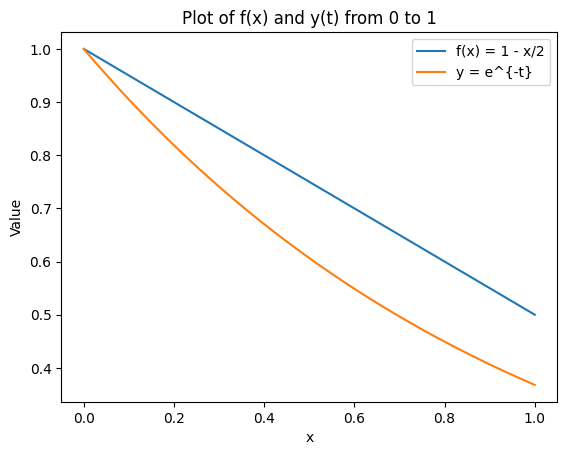

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
f = lambda x: 1 - x / 2
y = lambda t: np.exp(-t)

# Generate values
x = np.linspace(0, 1, 100)
f_values = f(x)
y_values = y(x)

# Plot the functions
plt.plot(x, f_values, label='f(x) = 1 - x/2')
plt.plot(x, y_values, label='y = e^{-t}')
plt.xlabel('x')
plt.ylabel('Value')
plt.legend()
plt.title('Plot of f(x) and y(t) from 0 to 1')
plt.show()

### Option 2: Least square minimization of the residual

Let's integrate the squared residual of f(x) plugged into the ODE, $y^\prime + y$

$$\begin{align}
R &= f^\prime(x) +f(x) \\
&= [b-1] + 1-x + x b \\
&= b+x[b-1] \\
R^2 &= b^2 + 2 b x[b - 1] + [x[b - 1]]^2 \\
F = \int_0^1 R^2 \ dx &= \frac{1}{3} [7 b^2 - 5 b + 1] \\
\end{align} $$

Note that in the end the integral of the residual, $F$ is a parabolic function of the parameter $b$. The minimum is found at:
$\frac{\partial F}{\partial b}(b) = 0$, for $b = \frac{5}{14}$. The approximate solution is $f(x) = 1-\frac{9}{14}x$.

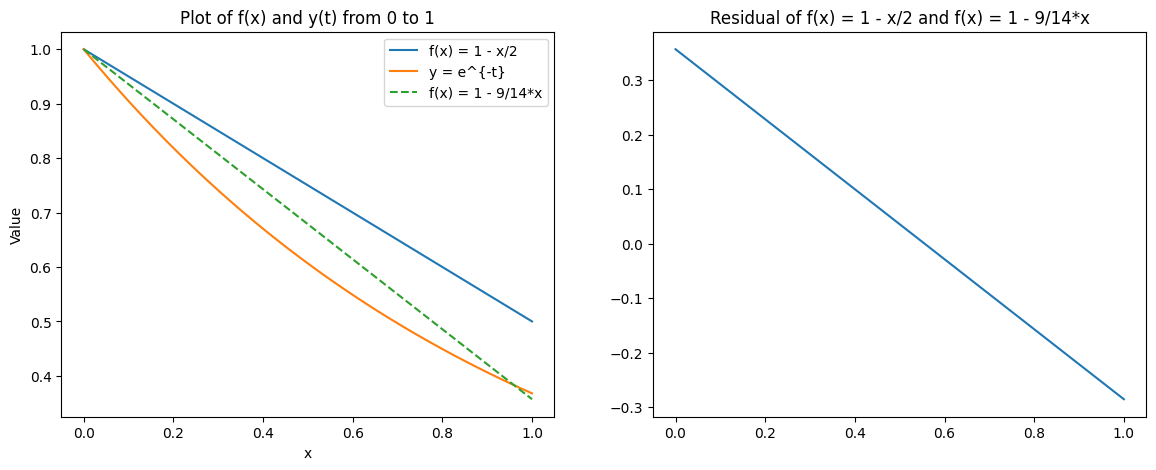

In [2]:
# Define the new function
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
f_new = lambda x: 1 - 9./14*x
f_new_values = f_new(x)


# Plot the functions
axs[0].plot(x, f_values, label='f(x) = 1 - x/2')
axs[0].plot(x, y_values, label='y = e^{-t}')
axs[0].plot(x, f_new_values, label='f(x) = 1 - 9/14*x', linestyle='--')
axs[0].set_xlabel('x')
axs[0].set_ylabel('Value')
axs[0].legend()
axs[0].set_title('Plot of f(x) and y(t) from 0 to 1')

# Plot the residual
residual = lambda x: -9/14 + 1 - 9./14*x
axs[1].plot(x, residual(x))
axs[1].set_title('Residual of f(x) = 1 - x/2 and f(x) = 1 - 9/14*x')

plt.show()

We see that option 2 does a better job of approximating the function over the full domain since it focusses on the integral of the residual.

You may have noticed that we did something funny here: we integrated $R^2$ and then took its derivative with respect to $b$ in order to find the minimum of the integral! I.e.:

$$\begin{align}
\frac{\partial F}{\partial b} = 0 &= \frac{\partial }{\partial b} \int_0^1 R^2 \ dx  \\
&= \int_0^1 2R \frac{\partial R}{\partial b}  \ dx \\
&= \int_0^1 R v  \ dx
\end{align} $$

where the residual has now been weighted by the function $v$. This is called the Method of Weighted Residual [MWR]. Let's try a different function and see what happens.

### Option 3: Integrate the MWR to find the parameters

Integrate the weighted residual function directly with a convenient choice of $v$.

lets take $v = x$ (to be motivated later) and integrate:

$$\begin{align}
\frac{\partial F}{\partial b} =0 &= \int_0^1 R x  \ dx \\
&= \int_0^1 \big[b+[b-1]x\big]x  \ dx \\
&= \int_0^1 b x+[b-1]x^2  \ dx \\
&= \bigg[ \frac{1}{6} x^2\big[3b+2[b-1]x\big]\bigg]_0^1 \\
&= b-\frac{2}{5} \\
\end{align} $$

which is very close to our previous solution $b = \frac{5}{14}$ but with a simpler integration. BUT, we are still let with analytically integrating! If only there were a way to express integrals as the sum of the integrand evaluated at certain points...

### Option 4: Express the MWR integral as the sum of the integrand evaluated at certain points.

Integrate the weighted residual function directly with a convenient choice of $v$ as the sum of the integrand evaluated at certain points:

Recall Gaussian Quadrature allows us to evaluate an integral by summing the integrand at the Gauss Points. The Gauss Points for the domain $[-1,1]$ are $\pm\frac{1}{\sqrt{3}}$, scaled to this integral domain become,


$$ \begin{align}
x_{[0,1]]} &= 0.5 (x_{[-1,1]} + 1) \\
&= \frac{1}{2} \bigg[1 \pm\frac{1}{\sqrt{3}} \bigg] \\
&\approx [0.21132487, 0.78867513]
\end{align} $$

and

$$\begin{align}
0 &= \int_0^1 R x  \ dx \\
&= Rx (x=.21132487) + Rx(x = .78867513) \\
&= -0.0446582 + 0.255983 b  -0.622008 + 1.41068 b \\
b &= \frac{2}{5}
\end{align} $$

### Recap of the approach

Let's recap what we've done:

1. parameterized a function as a weighted sum of simpler functions (a linear basis)
2. found a (simple) integral expression that minimizes the error in the approxiation (Minimized Weighted Residual)
3. performed the integration *exactly* using only function evaluations into a linear system (Gaussian quadrature)
4. Solved the linear system (I **told** you everything boiled down to linear systems!)

Practical solution of linear systems requires sparsity! Let's formalize our proceedure and see how we can ensure sparsity.